# Exercise 1: Setting Up the Environment

In [ ]:
!pip install pgmpy numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.8 MB/s eta 0:00:00


# Exercise 2: Building a Simple DBN


In [ ]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

dbn = DBN()

dbn.add_edges_from([
    (('Rain', 0), ('Sprinkler', 0)),
    (('Rain', 0), ('Rain', 1)),
    (('Sprinkler', 0), ('Sprinkler', 1)),
    (('Rain', 1), ('Sprinkler', 1))
])

cpd_rain_0 = TabularCPD(('Rain', 0), 2, [[0.7], [0.3]])
cpd_sprinkler_0 = TabularCPD(('Sprinkler', 0),
                              2,
                              [[0.4, 0.8], [0.6, 0.2]],
                              evidence=[('Rain', 0)],
                              evidence_card=[2])
cpd_rain_1 = TabularCPD(('Rain', 1),
                        2,
                        [[0.6, 0.2], [0.4, 0.8]],
                        evidence=[('Rain', 0)],
                        evidence_card=[2])
cpd_sprinkler_1 = TabularCPD(('Sprinkler', 1),
                             2,
                             [[0.2, 0.3, 0.6, 0.7], [0.8, 0.7, 0.4, 0.3]],
                             evidence=[('Rain', 1), ('Sprinkler', 0)],
                             evidence_card=[2,2])

dbn.add_cpds(cpd_rain_0, cpd_sprinkler_0, cpd_rain_1, cpd_sprinkler_1)

assert dbn.check_model()

print("The DBN model has been successfully created and is valid.")

The DBN model has been successfully created and is valid.


# Exercise 3: Performing Inference

In [ ]:
from pgmpy.inference import DBNInference
dbn_inf = DBNInference(dbn)

evidence = {
    ('Rain', 0): 1,
    ('Sprinkler', 0): 1
}

query_result = dbn_inf.forward_inference([('Sprinkler', 1)], evidence)

print("Probabilities of Sprinkler at time slice 1 given evidence:")
print(f"P(Sprinkler(1) | Rain(0)=True, Sprinkler(0)=On): {query_result[('Sprinkler', 1)].values}")

Probabilities of Sprinkler at time slice 1 given evidence:
P(Sprinkler(1) | Rain(0)=True, Sprinkler(0)=On): [0.62 0.38]


# Exercise 4: Visualizing the DBN


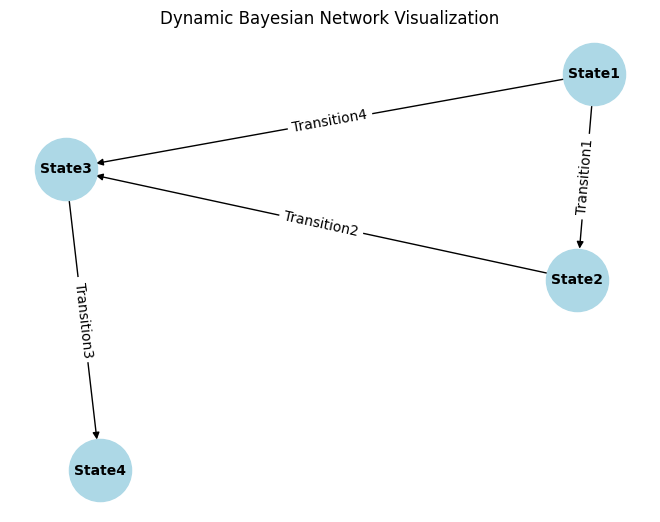

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

dbn = nx.DiGraph()
states = ['State1', 'State2', 'State3', 'State4']
dbn.add_nodes_from(states)
transitions = [('State1', 'State2'),
               ('State2', 'State3'),
               ('State3', 'State4'),
               ('State1', 'State3')]
dbn.add_edges_from(transitions)

pos = nx.spring_layout(dbn)

try:
    nx.draw(dbn, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

    edge_labels = {('State1', 'State2'): 'Transition1',
                   ('State2', 'State3'): 'Transition2',
                   ('State3', 'State4'): 'Transition3',
                   ('State1', 'State3'): 'Transition4'}
    nx.draw_networkx_edge_labels(dbn, pos, edge_labels=edge_labels)

    plt.title("Dynamic Bayesian Network Visualization")
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

# Exercise 5: Extending the DBN

The extended DBN model has been successfully created and is valid.
Probabilities of WetGrass at time slice t=1 given evidence:
P(WetGrass(1) | Rain(0)=True, Sprinkler(0)=On): [0.6918 0.3082]


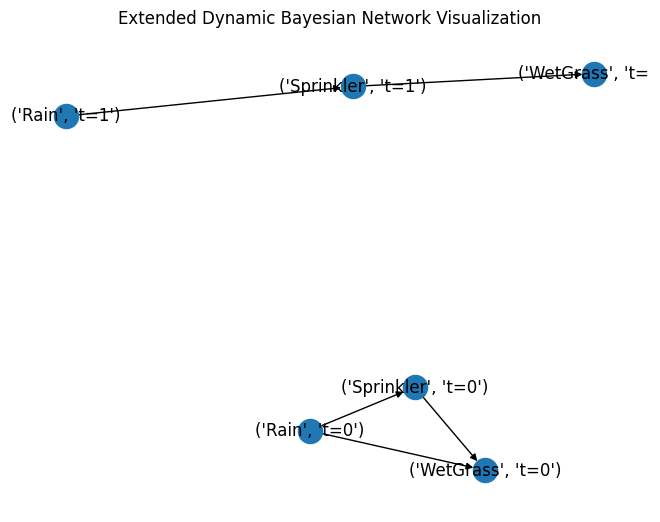

In [ ]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import DBNInference
import networkx as nx
import matplotlib.pyplot as plt

dbn = DBN()

dbn.add_edges_from([
    (('Rain', 0), ('Sprinkler', 0)),
    (('Rain', 0), ('Rain', 1)),
    (('Sprinkler', 0), ('Sprinkler', 1)),
    (('Rain', 1), ('Sprinkler', 1))
])

cpd_rain_0 = TabularCPD(('Rain', 0), 2, [[0.7], [0.3]])
cpd_sprinkler_0 = TabularCPD(('Sprinkler', 0),
                              2,
                              [[0.4, 0.8], [0.6, 0.2]],
                              evidence=[('Rain', 0)],
                              evidence_card=[2])
cpd_rain_1 = TabularCPD(('Rain', 1),
                        2,
                        [[0.6, 0.2], [0.4, 0.8]],
                        evidence=[('Rain', 0)],
                        evidence_card=[2])
cpd_sprinkler_1 = TabularCPD(('Sprinkler', 1),
                             2,
                             [[0.2, 0.3, 0.6, 0.7], [0.8, 0.7, 0.4, 0.3]],
                             evidence=[('Rain', 1), ('Sprinkler', 0)],
                             evidence_card=[2,2])

dbn.add_edges_from([
    (('Rain', 0), ('WetGrass', 0)),
    (('Sprinkler', 0), ('WetGrass', 0)),
    (('Rain', 1), ('WetGrass', 1)),
    (('Sprinkler', 1), ('WetGrass', 1))
])

cpd_wetgrass_0 = TabularCPD(('WetGrass', 0),
                            2,
                            [[0.99, 0.9, 0.9, 0.01], [0.01, 0.1, 0.1, 0.99]],
                            evidence=[('Rain', 0), ('Sprinkler', 0)],
                            evidence_card=[2,2])

cpd_wetgrass_1 = TabularCPD(('WetGrass', 1),
                            2,
                            [[0.99, 0.9, 0.9, 0.01], [0.01, 0.1, 0.1, 0.99]],
                            evidence=[('Rain', 1), ('Sprinkler', 1)],
                            evidence_card=[2,2])

dbn.add_cpds(cpd_rain_0, cpd_sprinkler_0, cpd_rain_1, cpd_sprinkler_1,
              cpd_wetgrass_0, cpd_wetgrass_1)

assert dbn.check_model()

print("The extended DBN model has been successfully created and is valid.")

dbn_inf = DBNInference(dbn)

evidence = {
    ('Rain', 0): 1,
    ('Sprinkler', 0): 1
}

query_result = dbn_inf.forward_inference([('WetGrass', 1)], evidence)

print("Probabilities of WetGrass at time slice t=1 given evidence:")
print(f"P(WetGrass(1) | Rain(0)=True, Sprinkler(0)=On): {query_result[('WetGrass', 1)].values}")

dbn_graph = nx.DiGraph()
dbn_graph.add_edges_from([
    (('Rain', 't=0'), ('Sprinkler', 't=0')),
    (('Rain', 't=0'), ('WetGrass', 't=0')),
    (('Sprinkler', 't=0'), ('WetGrass', 't=0')),
    (('Rain', 't=1'), ('Sprinkler', 't=1')),
    (('Sprinkler', 't=1'), ('WetGrass', 't=1')),
])

pos = nx.spring_layout(dbn_graph)
nx.draw(dbn_graph, pos, with_labels=True)
plt.title("Extended Dynamic Bayesian Network Visualization")
plt.show()